In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,NaN,130,322.0,NaN,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115,564.0,NaN,2.0,160.0,0.0,1.6,2.0,0.0,NaN
2,1.0,57.0,2.0,124,261.0,0.0,0.0,141.0,0.0,NaN,1.0,0.0,7.0
3,1.0,64.0,4.0,128,263.0,NaN,0.0,105.0,1.0,NaN,2.0,1.0,7.0
4,0.0,74.0,2.0,120,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140,294.0,NaN,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140,192.0,0.0,0.0,148.0,0.0,0.4,NaN,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	8
float64		column 2	22
float64		column 3	21
int64		column 4	0
float64		column 5	7
float64		column 6	28
float64		column 7	14
float64		column 8	14
float64		column 9	7
float64		column 10	14
float64		column 11	8
float64		column 12	14
float64		column 13	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,262.000000,248.000000,249.000000,270.000000,263.000000,242.000000,256.000000,256.000000,263.000000,256.000000,262.000000,256.000000,256.000000
mean,0.679389,54.330645,3.160643,131.344444,249.946768,0.152893,1.015625,149.851562,0.330798,1.082031,1.580153,0.671875,4.703125
std,0.467605,9.019746,0.940946,17.861608,52.055140,0.360630,0.997914,23.033851,0.471398,1.155647,0.618417,0.938162,1.945772
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.750000,3.000000,120.000000,213.500000,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,281.500000,0.000000,2.000000,166.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

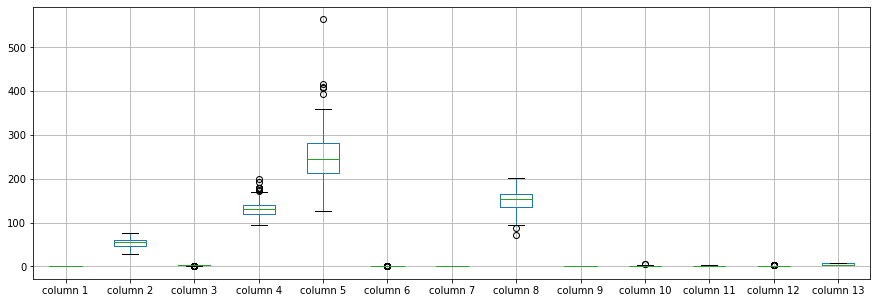

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.679389
column 2      54.330645
column 3       3.160643
column 4     131.344444
column 5     249.946768
column 6       0.152893
column 7       1.015625
column 8     149.851562
column 9       0.330798
column 10      1.082031
column 11      1.580153
column 12      0.671875
column 13      4.703125
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.085460,0.016868,-0.070589,-0.209301,0.052898,0.005031,-0.124245,0.188955,0.123358,0.042809,0.091510,0.395139
column 2,-0.085460,1.000000,0.107831,0.272836,0.209515,0.126119,0.077511,-0.391984,0.076948,0.214682,0.179420,0.333236,0.085710
column 3,0.016868,0.107831,1.000000,-0.063424,0.095969,-0.100188,0.062476,-0.299553,0.348804,0.152626,0.153876,0.242886,0.206579
column 4,-0.070589,0.272836,-0.063424,1.000000,0.172985,0.171596,0.114022,-0.017960,0.075592,0.213310,0.151558,0.069460,0.135492
column 5,-0.209301,0.209515,0.095969,0.172985,1.000000,0.033566,0.162798,-0.017998,0.069228,0.034140,-0.008062,0.120806,-0.006781
column 6,0.052898,0.126119,-0.100188,0.171596,0.033566,1.000000,0.081789,0.017894,-0.051504,-0.049649,0.078168,0.105361,0.016446
column 7,0.005031,0.077511,0.062476,0.114022,0.162798,0.081789,1.000000,-0.074785,0.114595,0.106146,0.154590,0.106300,-0.025893
column 8,-0.124245,-0.391984,-0.299553,-0.017960,-0.017998,0.017894,-0.074785,1.000000,-0.401924,-0.351773,-0.376412,-0.253935,-0.259349
column 9,0.188955,0.076948,0.348804,0.075592,0.069228,-0.051504,0.114595,-0.401924,1.000000,0.274471,0.250484,0.171952,0.309824
column 10,0.123358,0.214682,0.152626,0.213310,0.034140,-0.049649,0.106146,-0.351773,0.274471,1.000000,0.616727,0.279160,0.312796


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+77,13+77+77,13+77+77+77,13+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77,13+77+77+77,13+77+77,13+77,13], vae_layer = False, seed = 77)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 589.1122398376465
Epoch: 1 , loss: 589.5887565612793
Epoch: 2 , loss: 590.3347702026367
Epoch: 3 , loss: 589.8225402832031
Epoch: 4 , loss: 589.8099975585938
Epoch: 5 , loss: 589.5524101257324
Epoch: 6 , loss: 590.2098350524902
Epoch: 7 , loss: 589.3101348876953
Epoch: 8 , loss: 588.080509185791
Epoch: 9 , loss: 589.0112915039062
Epoch: 10 , loss: 588.8652076721191
Epoch: 11 , loss: 589.7878074645996
Epoch: 12 , loss: 589.2851409912109
Epoch: 13 , loss: 588.8017730712891
Epoch: 14 , loss: 588.1940765380859
Epoch: 15 , loss: 584.2787628173828
Epoch: 16 , loss: 578.013111114502
Epoch: 17 , loss: 574.6988563537598
Epoch: 18 , loss: 571.2708625793457
Epoch: 19 , loss: 564.7756500244141
Epoch: 20 , loss: 552.6653442382812
Epoch: 21 , loss: 532.3385581970215
Epoch: 22 , loss: 515.1839294433594
Epoch: 23 , loss: 498.1504096984863
Epoch: 24 , loss: 472.6920528411865
Epoch: 25 , loss: 451.7212886810303
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,-2.284255,0,0.0,-0.162483,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0,0.0,-0.037531,0.000000,0.0,0.0,0.000000,0.000000,0.0,-4.674335
2,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.0,0.0,0.160708,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0,0.0,-0.030485,0.000000,0.0,0.0,1.141907,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,-0.040381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
266,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
267,0.0,0.0,0.000000,0,0.0,-0.040476,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
268,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.542552,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(420.86785265971776, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.07772614926171412

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       5.682317
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       1.000000
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,1.715745,130,322.0,-0.162483,2.000000,109.0,0.0,2.400000,2.000000,3.0,3.000000
1,0.0,67.0,3.000000,115,564.0,-0.037531,2.000000,160.0,0.0,1.600000,2.000000,0.0,2.325665
2,1.0,57.0,2.000000,124,261.0,0.000000,0.000000,141.0,0.0,0.460708,1.000000,0.0,7.000000
3,1.0,64.0,4.000000,128,263.0,-0.030485,0.000000,105.0,1.0,1.341907,2.000000,1.0,7.000000
4,0.0,74.0,2.000000,120,269.0,0.000000,2.000000,121.0,1.0,0.200000,1.000000,1.0,2.959619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.000000,172,199.0,1.000000,0.000000,162.0,0.0,0.500000,1.000000,0.0,7.000000
266,1.0,44.0,2.000000,120,263.0,0.000000,0.000000,173.0,0.0,0.000000,1.000000,0.0,7.000000
267,0.0,56.0,2.000000,140,294.0,-0.040476,2.000000,153.0,0.0,1.300000,2.000000,0.0,3.000000
268,1.0,57.0,4.000000,140,192.0,0.000000,0.000000,148.0,0.0,0.400000,3.542552,0.0,6.000000


In [20]:
imputations[-1].to_excel("Sheart_NG_5(imp).xlsx", index=False, header=False)